### 학습목표
 1. OPEN API 사용하여 데이터 획득하기

#### 공공데이터 포털 OPEN API 사용하기
1. 공공데이터 포털 회원가입/로그인(https://www.data.go.kr/)
2. API 사용 요청 / 키 발급
3. API 문서(specification) 확인
4. API 테스트 및 개발

#### Endpoint 확인하기
 - API가 서비스되는 서버의 IP 혹은 domain 주소

In [3]:
endpoint='http://api.visitkorea.or.kr/openapi/service/rest/EngService/areaCode?serviceKey={}&numOfRows=10&pageSize=10&pageNo=1&MobileOS=ETC&MobileApp=AppTest&areaCode=1&_type=json'.format(serviceKey)
print(endpoint)

http://api.visitkorea.or.kr/openapi/service/rest/EngService/areaCode?serviceKey=TllHFTTM52iJjmYDxB74JfkCt4YfxUFSHo2oWheKklX%2FGZETNFNHbnQRqHeVhXH81RgdI90eWpHDPAizONyGJA%3D%3D&numOfRows=10&pageSize=10&pageNo=1&MobileOS=ETC&MobileApp=AppTest&areaCode=1&_type=json


#### key 값 확인하기
 - 서비스 호출 트래킹할 목적이나 악의적인 사용을 금지할 목적으로 주로 사용
 - 새로 발급받은 키는 1시간 이후 사용 가능

In [1]:
serviceKey='TllHFTTM52iJjmYDxB74JfkCt4YfxUFSHo2oWheKklX%2FGZETNFNHbnQRqHeVhXH81RgdI90eWpHDPAizONyGJA%3D%3D'

#### Parameter 확인하기
 - API 호출에 필요한 parameter 값 확인 및 구성

In [10]:
endpoint='http://api.visitkorea.or.kr/openapi/service/rest/EngService/areaCode?serviceKey={}&numOfRows=10&pageSize=10&pageNo={}&MobileOS=ETC&MobileApp=AppTest&areaCode=1&_type=json'.format(serviceKey,1)

resp=requests.get(endpoint)
##print(resp.status_code)
##print(resp.text)

data=resp.json()
print(data['response']['body']['items']['item'][0])

{'code': 1, 'name': 'Gangnam-gu', 'rnum': 1}


#### 요청 및 Response 확인
 - requests 모듈을 활용하여 API 호출
 - response 확인하여 원하는 정보 추출
 - json 데이터의 경우, python dictionary로 변경하여 사용가능

http://api.visitkorea.or.kr/openapi/service/rest/EngService/areaBasedList?serviceKey=TllHFTTM52iJjmYDxB74JfkCt4YfxUFSHo2oWheKklX%2FGZETNFNHbnQRqHeVhXH81RgdI90eWpHDPAizONyGJA%3D%3D&numOfRows=10&pageSize=10&pageNo=1&MobileOS=ETC&MobileApp=AppTest&listYN=Y&arrange=A&areaCode=35&_type=json
http://tong.visitkorea.or.kr/cms/resource/21/2577221_image2_1.jpg


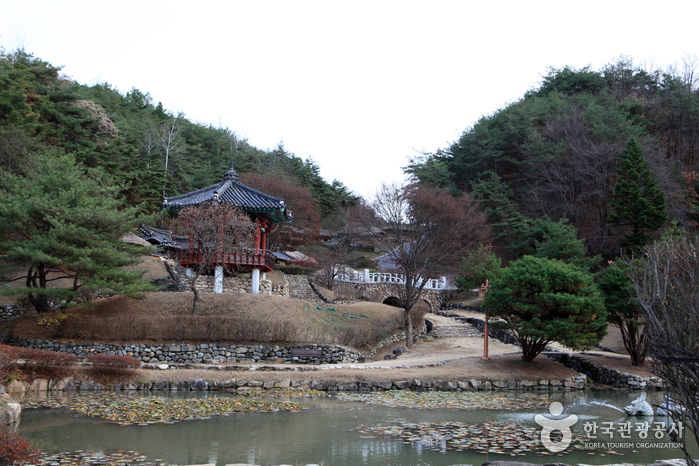

In [26]:
import os
from PIL import Image
import requests
from IPython.display import Image

endpoint2='http://api.visitkorea.or.kr/openapi/service/rest/EngService/areaBasedList?serviceKey={}&numOfRows=10&pageSize=10&pageNo=1&MobileOS=ETC&MobileApp=AppTest&listYN=Y&arrange=A&areaCode=35&_type=json'.format(serviceKey)
print(endpoint2)
resp2=requests.get(endpoint2)
data=resp2.json()
print(data['response']['body']['items']['item'][0]['firstimage'])



for i in range(0,7):
    image_url = (data['response']['body']['items']['item'][i]['firstimage'])
    image = requests.get(image_url).content #서버 응답을 받아 파일내용 획득. content는 응답받은 RawData
    filename ='python{}.png'.format(i)  #URL에서 파일명 획득. 뒷부분의 python.png란 파일명만 저장
    with open(filename, 'wb') as f: #wb: 쓰기 파이러니
        f.write(image)#파일 저장
Image(filename='python{}.png'.format(3))

